In [1]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import trapz, simpson
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

In [2]:
cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey')

## Compare PINN to (more accurate) PINN with fixed parameters

In [8]:
nx, ny, ntheta = 101, 101, 29
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
theta = np.linspace(-np.pi, np.pi, ntheta)
theta_zero = np.argmin(np.abs(theta))

theta_max = 0.25*np.pi
theta_max_ind = np.any([theta == theta_max, theta == -theta_max], axis=0)
if np.sum(theta_max_ind) != 0:
    print(np.nonzero(theta_max_ind))
else:
    ntheta += 2
    theta = np.concatenate([theta, np.array([theta_max, -theta_max])])
    theta = np.sort(theta)
    theta_max_ind = np.any([theta == theta_max, theta == -theta_max], axis=0)
    print(np.nonzero(theta_max_ind))

#u_abs_num = np.load('u_abs_num.npy')
#u_abs_num = u_abs_num[:,:,np.abs(theta)!=0.25*np.pi]
#u_sca_num = np.load('u_sca_num.npy')
#u_sca_num = u_sca_num[:,:,np.abs(theta)!=0.25*np.pi]
theta = theta[np.abs(theta)!=0.25*np.pi]
u_abs_PINN = np.load('../data/u_abs_PINN.npy')
u_sca_PINN = np.load('../data/u_sca_PINN.npy')
u_sca_PINN += u_abs_PINN
u_abs_fixedPINN = np.load('../data/u_abs_fixedPINN.npy')
u_sca_fixedPINN = np.load('../data/u_sca_fixedPINN.npy')
u_sca_fixedPINN += u_abs_fixedPINN

#diff_num = u_sca_num - u_abs_num
diff_PINN = u_sca_PINN - u_abs_PINN
diff_fixedPINN = u_sca_fixedPINN - u_abs_fixedPINN

(array([11, 19]),)


In [9]:
comp1_abs = u_abs_fixedPINN
comp1_sca = u_sca_fixedPINN
comp1_dif = diff_fixedPINN

comp2_abs = u_abs_PINN
comp2_sca = u_sca_PINN
comp2_dif = diff_PINN

i_dir = 0

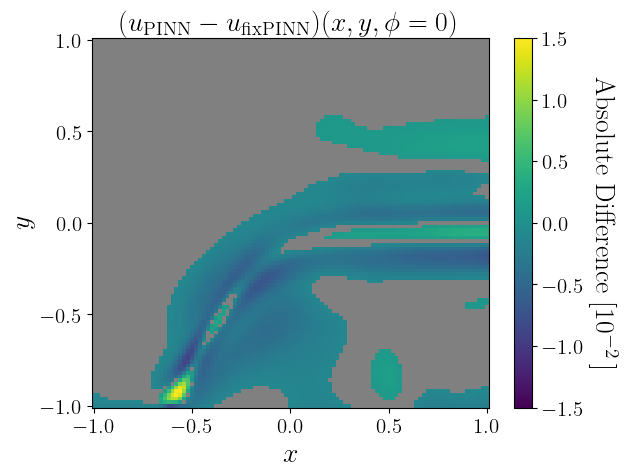

In [16]:
fontsize = 15
diff_sca = comp2_sca - comp1_sca
diff_sca[np.abs(diff_sca)<0.001] = np.nan
pcm = plt.pcolormesh(x[:],y[:], 100*diff_sca[:,:,theta_zero+i_dir].T, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = plt.colorbar(pcm)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(r'Absolute Difference $[10^{-2}\,]$', rotation=270, fontsize=fontsize+5, labelpad=25)
#cb.ax.set_title(r'$\times 10^{-2}$', fontsize=fontsize, position=(1,1))
plt.xticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.yticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.xlabel(r'$x$', fontsize=fontsize+5)
plt.ylabel(r'$y$', fontsize=fontsize+5)
plt.title(r'$(u_\mathrm{PINN} - u_\mathrm{fixPINN}) (x,y,\phi=0)$', fontsize=fontsize+5)
plt.savefig('../images/fixPINN_diff.png', dpi=200)

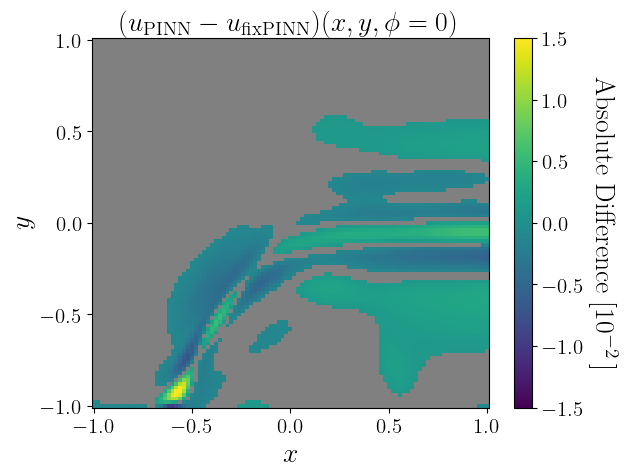

In [15]:
# Compare only absorption component
diff_abs = comp2_abs - comp1_abs
diff_abs[np.abs(diff_abs)<0.001] = np.nan
pcm = plt.pcolormesh(x[:],y[:], 100*diff_abs[:,:,theta_zero+i_dir].T, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = plt.colorbar(pcm)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(r'Absolute Difference $[10^{-2}\,]$', rotation=270, fontsize=fontsize+5, labelpad=25)
#cb.ax.set_title(r'$\times 10^{-2}$', fontsize=fontsize, position=(1,1))
plt.xticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.yticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.xlabel(r'$x$', fontsize=fontsize+5)
plt.ylabel(r'$y$', fontsize=fontsize+5)
plt.title(r'$(u_\mathrm{PINN} - u_\mathrm{fixPINN}) (x,y,\phi=0)$', fontsize=fontsize+5)

Text(0.5, 1.0, '$(u_\\mathrm{PINN} - u_\\mathrm{fixPINN}) (x,y,\\phi=0)$')

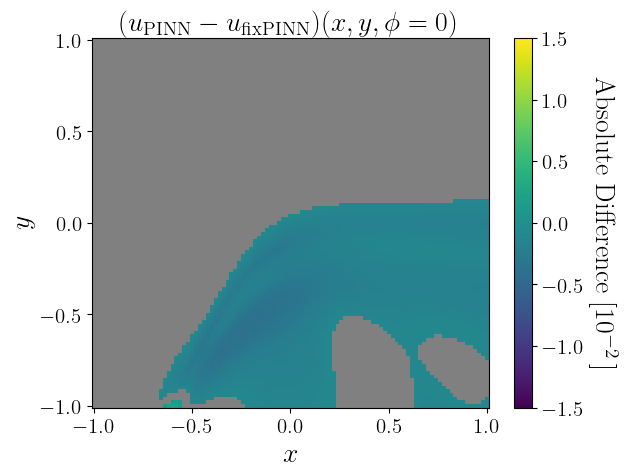

In [17]:
# Compare only scattering component
diff_diff = comp2_dif - comp1_dif
diff_diff[np.abs(diff_diff)<0.001] = np.nan
pcm = plt.pcolormesh(x[:],y[:], 100*diff_diff[:,:,theta_zero+i_dir].T, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = plt.colorbar(pcm)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(r'Absolute Difference $[10^{-2}\,]$', rotation=270, fontsize=fontsize+5, labelpad=25)
#cb.ax.set_title(r'$\times 10^{-2}$', fontsize=fontsize, position=(1,1))
plt.xticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.yticks(np.linspace(-1,1,5), fontsize=fontsize)
plt.xlabel(r'$x$', fontsize=fontsize+5)
plt.ylabel(r'$y$', fontsize=fontsize+5)
plt.title(r'$(u_\mathrm{PINN} - u_\mathrm{fixPINN}) (x,y,\phi=0)$', fontsize=fontsize+5)